# GMM in Scikit Learn
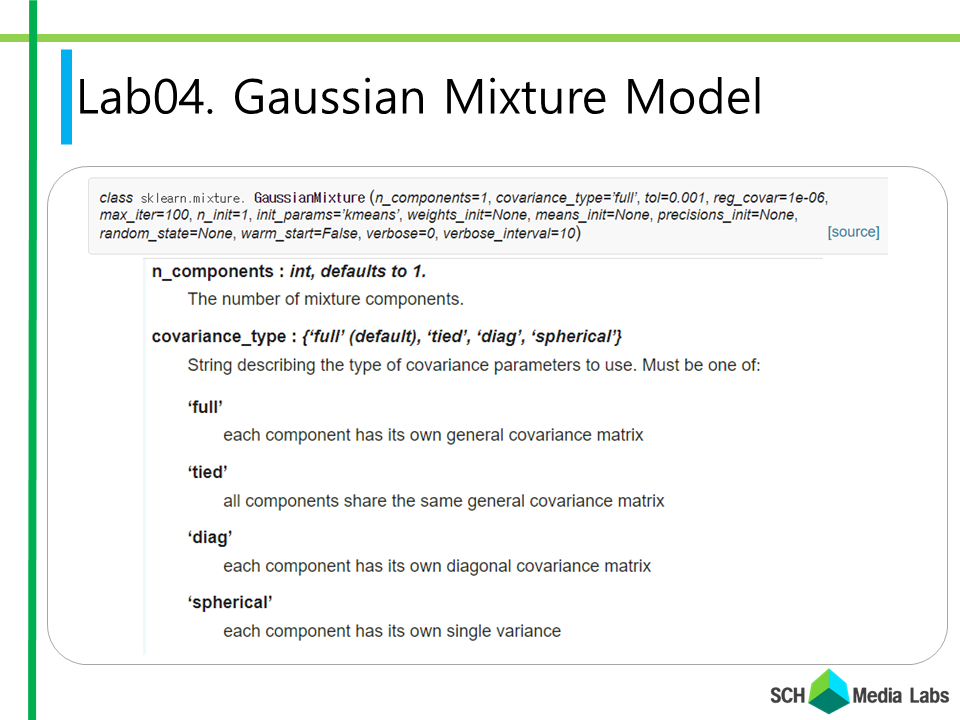

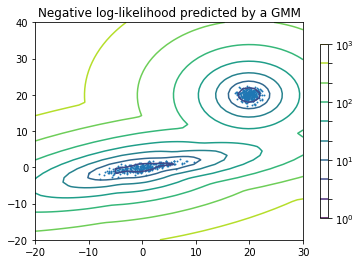

[[ 1.99145355e+01  1.99755635e+01]
 [ 1.42606422e-02 -1.55488090e-01]
 [ 4.02076167e+00  8.09065517e-01]
 [-3.86333801e+00 -6.81177580e-01]]
[[[1.02179964e+00 3.28158679e-03]
  [3.28158679e-03 9.90375215e-01]]

 [[1.91875765e+00 4.19557249e-01]
  [4.19557249e-01 5.52989483e-01]]

 [[3.96718568e+00 7.71452993e-01]
  [7.71452993e-01 4.29353896e-01]]

 [[3.43667410e+00 9.57177836e-01]
  [9.57177836e-01 7.13452344e-01]]]
[0.5        0.2266403  0.12491139 0.14844831]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.mixture import GaussianMixture

n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = GaussianMixture(n_components=4, covariance_type='full', max_iter = 500)
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

# find mean/covariance and weight of gaussian mixtures!
print(clf.means_)
print(clf.covariances_)
print(clf.weights_)